In [1]:
import pandas as pd
#Definindo as variaveis que são utilizadas para abrigar os data frame
vendas_df = pd.read_csv("Contoso - Vendas - 2017.csv", sep = ";")
produtos_df = pd.read_csv("Contoso - Cadastro Produtos.csv", sep = ";")
lojas_df = pd.read_csv("Contoso - Lojas.csv", sep = ";", encoding = "ISO-8859-1")
clientes_df = pd.read_csv("Contoso - Clientes.csv", sep= ";", encoding = "ISO-8859-1")

#Seprando colunas especificas de maneira com que, o dataframe irá abrigar somente as colunas especificos 
clientes_df = clientes_df[["ÿID Cliente","E-mail"]]
produtos_df = produtos_df[["Nome da Marca","ID Produto"]]
lojas_df = lojas_df[["ÿID Loja", "Nome da Loja"]]

#Renomeando colunas com a função .rename()
clientes_df = clientes_df.rename(columns = {"ÿID Cliente": "ID Cliente"})
lojas_df = lojas_df.rename(columns = {"ÿID Loja": "ID Loja"})

#juntando as colunas separadas com o dataframe, vendas_df, utilizando a função .merge()
vendas_df = vendas_df.merge(produtos_df, on="ID Produto")
vendas_df = vendas_df.merge(lojas_df, on="ID Loja")
vendas_df = vendas_df.merge(clientes_df, on= "ID Cliente")

#Renomando outra coluna dentro do dataframe finalizado.
vendas_df = vendas_df.rename(columns = {"E-mail": "E-mail Clientes"})
display(vendas_df)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome da Marca,Nome da Loja,E-mail Clientes
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,A. Datum,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Adventure Works,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Wide World Importers,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Contoso,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980637,878244,23/11/2017,23/11/2017,0,110,889,4,347,12,1,Contoso,Loja Contoso Orlando,edowner9m@imdb.com
980638,920243,09/12/2017,10/12/2017,1,261,1367,5,38781,13,0,Contoso,Loja Contoso Damascus No.1,ruben31@adventure-works.com
980639,467482,21/06/2017,25/06/2017,4,115,269,1,553,10,0,Contoso,Loja Contoso New York No.1,akuhnertfc@themeforest.net
980640,853643,13/11/2017,20/11/2017,7,115,809,4,38860,6,0,Contoso,Loja Contoso New York No.1,anne5@adventure-works.com


In [2]:
# Qual cliente comprou mais vezes?
frequencia_clientes = vendas_df["E-mail Clientes"].value_counts()
#value_counts() =  função utilizada para contar quantas vezes todos os valores aparecem na coluna especificada ["E-mail Clientes"]
display(frequencia_clientes)

#frequencia_clientes[0:5].plot(figsize=(15,5))
#Nesta linha, esta sendo definido o intervalo de valores que quero exibir no meu grafico "plot" e com o "figsize", definindo a largura e altura do grafico.

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail Clientes, Length: 38907, dtype: int64

In [4]:
vendas_clientes = vendas_df.groupby("Nome da Loja").sum()
display(vendas_clientes)
vendas_loja = vendas_clientes[["Quantidade Vendida","Quantidade Devolvida"]]
display(vendas_loja)




C:\Users\RD\AppData\Local\Temp\ipykernel_1240\3368304365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vendas_clientes = vendas_df.groupby("Nome da Loja").sum()


,Numero da Venda,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
Nome da Loja,,,,,,,,
Loja Contoso Albany,1202431493,5537,279756,2256167,5099,48257399,26353,298
Loja Contoso Alexandria,1180450098,5336,449696,2254764,5041,48586319,26247,326
Loja Contoso Amsterdam,1463641203,6295,721440,2855945,21345,58902735,28294,401
Loja Contoso Anchorage,1214566953,5441,458964,2328863,5252,49081995,27451,361
Loja Contoso Annapolis,1196644689,5401,466995,2243342,5131,47511944,26065,300
...,...,...,...,...,...,...,...,...
Loja Contoso Yokohama,1277269788,5423,681377,2331010,10524,50296371,28023,367
Loja Contoso York,1447746885,6402,600372,2736443,20990,58801825,27164,365
Loja Contoso koln No.1,1473231489,6712,699944,2802822,21812,60117285,29046,356


,Quantidade Vendida,Quantidade Devolvida
Nome da Loja,,
Loja Contoso Albany,26353,298
Loja Contoso Alexandria,26247,326
Loja Contoso Amsterdam,28294,401
Loja Contoso Anchorage,27451,361
Loja Contoso Annapolis,26065,300
...,...,...
Loja Contoso Yokohama,28023,367
Loja Contoso York,27164,365
Loja Contoso koln No.1,29046,356


,Quantidade Vendida,Quantidade Devolvida
Nome da Loja,,
Loja Contoso Catalog,1029117,9615
Loja Contoso North America Online,701961,8206
Loja Contoso Europe Online,616845,8174
Loja Contoso Asia Online,578458,6646
Loja Contoso North America Reseller,520176,6165
...,...,...
Loja Contoso Berlin,379,5
Loja Contoso Paterson,371,2
Loja Contoso Marseille,370,3


<Axes: xlabel='Nome da Loja'>

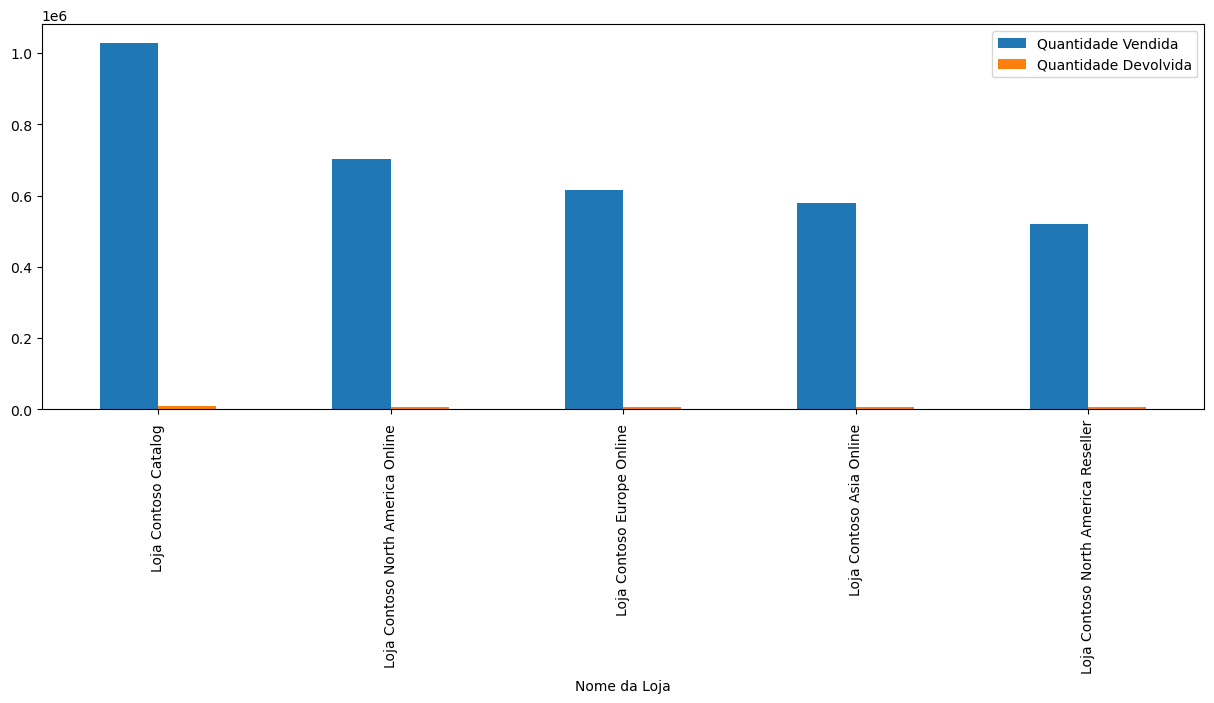

In [34]:
#ordenando o dataframe. 1 opção, utilizando a função, sort_values(), para ordenar a coluna do menor para o maior

vendas_loja = vendas_loja.sort_values("Quantidade Vendida", ascending = False)
display(vendas_loja)
vendas_loja[0:5].plot(figsize=(15,5), kind="bar")

In [35]:
#extraindo o maior valor e o indice do maior valor, com as funções, .max() e .idxmax()
maior_valor = vendas_loja["Quantidade Vendida"].max()
melhor_loja = vendas_loja["Quantidade Vendida"].idxmax()
print("Melhor Loja: {}, Quantidade de Vendas: {}".format(melhor_loja,maior_valor))

Melhor Loja: Loja Contoso Catalog , Quantidade de Vendas: 1029117


In [42]:
#buscando o menor valor.
menor_venda = vendas_loja["Quantidade Vendida"].min()
pior_venda = vendas_loja["Quantidade Vendida"].idxmin()
print("Pior Loja: {}, Quantidade de Vendas: {}".format(pior_venda,menor_venda))




Pior Loja: Loja Contoso Venezia , Quantidade de Vendas: 234
